# Dotplot Geometry

## Preparation


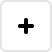
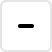
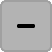
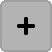
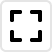
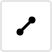
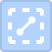
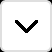
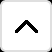
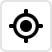

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
DEF_BIN_COUNT = 10

In [3]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [4]:
mtcars_df = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")
mtcars_df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
mpg_binwidth = (mtcars_df.mpg.max() - mtcars_df.mpg.min()) / DEF_BIN_COUNT

In [6]:
mpg_df = pd.DataFrame(list(zip(*np.histogram(mtcars_df.mpg, bins=DEF_BIN_COUNT))), columns=["count", "mpg"])
mpg_df['binwidth'] = [mpg_binwidth] * mpg_df.shape[0]
mpg_df.head()

,count,mpg,binwidth
0,2,10.40,2.35
1,4,12.75,2.35
2,6,15.10,2.35
3,6,17.45,2.35
4,5,19.80,2.35


## Minimalistic example

In [7]:
ggplot(mtcars_df, aes(x="mpg")) + geom_dotplot() + ggtitle("Simplest example")

## Comparison of geoms

In [8]:
PACIFIC_BLUE = '#118ed8'

In [9]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_area(stat='density', fill=PACIFIC_BLUE) + \
    geom_dotplot(binwidth=mpg_binwidth, color=PACIFIC_BLUE, fill='white') + \
    ggtitle("density + dotplot")

In [10]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_histogram(binwidth=mpg_binwidth, color='white') + \
    geom_dotplot(binwidth=mpg_binwidth, method='histodot', color=PACIFIC_BLUE, fill='white') + \
    coord_fixed(ratio=mpg_binwidth) + \
    ggtitle("histogram + dotplot")

## Parameters

### `stackdir`

In [11]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(binwidth=mpg_binwidth, stackdir='up') + ggtitle("stackdir='up' (default)")
p2 = p + geom_dotplot(binwidth=mpg_binwidth, stackdir='down') + ggtitle("stackdir='down'")
p3 = p + geom_dotplot(binwidth=mpg_binwidth, stackdir='center') + ggtitle("stackdir='center'")
p4 = p + geom_dotplot(binwidth=mpg_binwidth, stackdir='centerwhole') + ggtitle("stackdir='centerwhole'")

plot_matrix([p1, p2, p3, p4])

### `stackratio`

In [12]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(binwidth=mpg_binwidth, stackratio=1.0) + ggtitle("stackratio=1.0 (default)")
p2 = p + geom_dotplot(binwidth=mpg_binwidth, stackratio=0.5) + ggtitle("stackratio=0.5")
p3 = p + geom_dotplot(binwidth=mpg_binwidth, stackratio=1.5) + ggtitle("stackratio=1.5")

plot_matrix([p1, p2, p3])

### `dotsize`

In [13]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(binwidth=mpg_binwidth, dotsize=1.0) + ggtitle("dotsize=1.0 (default)")
p2 = p + geom_dotplot(binwidth=mpg_binwidth, dotsize=0.5) + ggtitle("dotsize=0.5")
p3 = p + geom_dotplot(binwidth=mpg_binwidth, dotsize=1.5) + ggtitle("dotsize=1.5")

plot_matrix([p1, p2, p3])

### `center`

In [14]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(binwidth=mpg_binwidth, method='histodot') + ggtitle("Default")
p2 = p + geom_dotplot(binwidth=mpg_binwidth, method='histodot', center=11.0) + ggtitle("center=11.0")

plot_matrix([p1, p2])

### `boundary`

In [15]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(binwidth=mpg_binwidth, method='histodot') + ggtitle("Default")
p2 = p + geom_dotplot(binwidth=mpg_binwidth, method='histodot', boundary=10.0) + ggtitle("boundary=10.0")

plot_matrix([p1, p2])

### `bins`

In [16]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(method='histodot') + ggtitle("Default")
p2 = p + geom_dotplot(method='histodot', bins=20) + ggtitle("bins=20")

plot_matrix([p1, p2])

## Grouping

In [17]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_dotplot(aes(fill=as_discrete("cyl")), \
                 binwidth=mpg_binwidth, color='black') + \
    ggtitle("method='dotdensity'")

In [18]:
p = ggplot(mtcars_df, aes(x="mpg"))
p1 = p + geom_dotplot(aes(fill=as_discrete("cyl")), method='histodot', \
                      binwidth=mpg_binwidth, color='black') + \
    ggtitle("method='histodot' (default)")
p2 = p + geom_dotplot(aes(fill=as_discrete("cyl")), method='histodot', \
                      binwidth=mpg_binwidth, stackgroups=True, color='black') + \
    ggtitle("method='histodot' and stackgroups=True")

plot_matrix([p1, p2])

## Tooltips

In [19]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_dotplot(binwidth=mpg_binwidth, \
                 tooltips=layer_tooltips().line("Stack center|^x")\
                                          .line("Number of dots in stack|@..count..")\
                                          .line("Dot diameter|@..binwidth..")) + \
    ggtitle("With tooltips")

## Facetting

In [20]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_dotplot(aes(fill=as_discrete("cyl")), \
                 binwidth=mpg_binwidth, color='black') + \
    facet_grid(x="cyl") + \
    ggtitle("facet_grid()")

## Coordinates

### Fixed

In [21]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_dotplot(binwidth=mpg_binwidth) + \
    coord_fixed(ratio=mpg_binwidth) + \
    ggtitle("Fixed coordinates")

### Flip

In [22]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_dotplot(binwidth=mpg_binwidth) + \
    coord_flip() + \
    ggtitle("Flip coordinates")

## "identity" statistic

In [23]:
ggplot(mpg_df, aes(x="mpg", stacksize="count", binwidth="binwidth")) + \
    geom_dotplot(stat='identity') + \
    ggtitle("stat='identity'")

## Additional layers

In [24]:
ggplot(mtcars_df, aes(x="mpg")) + \
    geom_dotplot(aes(fill=as_discrete("vs")), method='histodot', \
                 bins=9, stackdir='center', \
                 stackratio=0.8, dotsize=0.8, \
                 color='black', alpha=.5, size=1) + \
    scale_fill_brewer(type='qual', palette='Set1') + \
    theme_grey() + \
    ggtitle("Some additional aesthetics, parameters and layers")